<a href="https://colab.research.google.com/github/himeshmehta/Handwritten-digit-Recognizer/blob/master/hand_written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist

In [0]:
# load the data 
( X_train,Y_train ),( X_test,Y_test ) = mnist.load_data()

In [0]:
# data summary
def data_summary(X_train,Y_train,x_test,y_test):
  print("Shape of training image set",X_train.shape)
  print("Shape of training label set",Y_train.shape)
  print("Shape of testing image set",X_test.shape)
  print("Shape of testing label set",Y_test.shape)
       


In [105]:
# analyse the data summary
data_summary(X_train,Y_train,X_test,Y_test)

Shape of training image set (60000, 28, 28)
Shape of training label set (60000,)
Shape of testing image set (10000, 28, 28)
Shape of testing label set (10000,)


here dataframe is in format of (x,y,z) .
to make it usable we need to convert into (m,n) format.
so reshape the data frame ( X_train , Y_train) such that number of columns becomes 784 

In [106]:
X_train = X_train.reshape( (60000,784) )
X_test = X_test.reshape( (10000,784) )

#again analyse the data shape
data_summary(X_train,Y_train,X_test,Y_test)

Shape of training image set (60000, 784)
Shape of training label set (60000,)
Shape of testing image set (10000, 784)
Shape of testing label set (10000,)


Now our dataframe contain 784 columns  where each columns contain values from 0-255. Now we are going normalise the data.
but before doing that we need to convert type of data because on normalisation we will getting our data in float type. 

In [0]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

In [0]:
# guassian normalisation
# Z-score
X_train = ( X_train-np.mean(X_train) )/np.std(X_train)
X_test  = ( X_test-np.mean(X_test) )/np.std(X_test)

convert class vector into binary class vector.
beacuse we are going to use NN where we have a output layer of 10 classes (0-9).
here each row in Y tells us about  labels (or class) .

keras.utils.to_categorical(y, num_classes=10,)

used for categorical crossentropy.

> after executing above line of code .
 new dimesion of array will be (initial no. of rows , num_classes )


In [109]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train,10)
Y_test =  to_categorical(Y_test,10)
data_summary(X_train,Y_train,X_test,Y_test)

Shape of training image set (60000, 784)
Shape of training label set (60000, 10)
Shape of testing image set (10000, 784)
Shape of testing label set (10000, 10)


**Building the MULTILAYER PERCEPTRON**

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [0]:
model = Sequential()
# add first hidden layer
model.add(Dense(512,activation='relu',input_shape = (784,)))
model.add(Dropout(0.2))

# add second hidden layer where we have  256 neurons and each neuron is subjected to 512 input from last laye

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

# add output layer where we have 10 neuron corresponding to each class num_class
model.add(Dense(10,activation='softmax'))



In [0]:

## compile the model .. 
model.compile( loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'] )


In [113]:
# install livelossplot to visualise the test accuracy and loss
pip install livelossplot


In [0]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

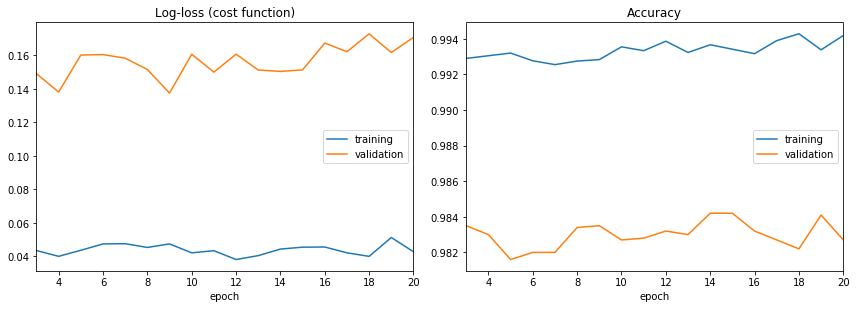

Log-loss (cost function):
training   (min:    0.038, max:    0.051, cur:    0.043)
validation (min:    0.136, max:    0.173, cur:    0.171)

Accuracy:
training   (min:    0.992, max:    0.994, cur:    0.994)
validation (min:    0.982, max:    0.984, cur:    0.983)


In [120]:
## train the model
batch_size = 128
epoch_num = 10
model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=20,
          verbose = 2,
          callbacks=[plot_losses],
          validation_data=(X_test,Y_test))

In [121]:
# evaluate the model on test set
score = model.evaluate(X_test,Y_test)
print("test loss",score[0])
print("test accuracy",score[1])

10000/10000 [==============================] - 1s 61us/step
test loss 0.17083282508443298
test accuracy 0.9827


In [122]:
# show model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
